In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle, resample
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import t
from tqdm import tqdm

In [2]:
def GetS(x):
    return np.sqrt( np.sum( (x - np.mean(x))**2 )/(len(x)-1) )

In [3]:
def Getdf(n1,n2,s1,s2):
    
    numerator = ( s1**2/n1 + s2**2/n2 )**2
    denominator = (s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1)
    
    return int( numerator/denominator )

In [17]:
def GetHisto(L, h = 1):
    
    min_, max_ = np.min(L), np.max(L)
    bins = np.arange(min_, max_+h, h)
    #print(bins)

    H1, bines = np.histogram(L, bins=bins)
    w = np.diff(bines)

    m = bines[:-1] + 0.5*w[0]
    H1Norm = H1 / np.sum(H1*w) 

    return H1, H1Norm, bines, m,w

In [18]:
sample1 = np.array([6.0,5.0,6.5,5.0,4.0,5.0,5.0,5.0,7.0,5.5,4.5])
sample2 = np.array([7.0,8.0,8.5,7.4,8.9,6.7,9.0,8.4,7.8,5.3,8.1])

In [19]:
r = np.random.normal(2,3,size=100)
#print(r)

In [32]:
h,h1,_,m,w = GetHisto(r, h= 2)
print(np.sum(h1*w))

1.0


<BarContainer object of 8 artists>

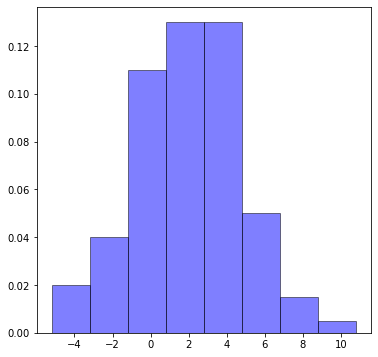

In [33]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(m,h1,color='b',width=w,ec='k',alpha=0.5, label='Bootstrapped')